# Task 2:- Prediction using Unsupervised ML (Level - Beginner)

# Objective of the problem:- Predicting optimum number of clusters using unsupervised ML and represent it visually.

## Author :- Nikhil

# Method for unsupervised ML used:- K-Means Clustering

#### Unsupervised machine learning is a type of machine learning where the model is not trained on labeled data but rather on raw, unlabeled data. K-means clustering is a popular unsupervised machine learning algorithm that is used for clustering and segmentation of data.

#### The k-means algorithm is an iterative algorithm that aims to partition a set of data points into k clusters. The algorithm starts by randomly selecting k initial cluster centroids and assigns each data point to its nearest centroid. Then, it iteratively updates the centroids and re-assigns the data points to their nearest centroid until the convergence criteria are met.

#### One application of k-means clustering is for prediction. Given a new data point, the k-means algorithm can be used to predict which cluster it is likely to belong to based on the cluster centroids and the distances between the data point and the centroids.

#### To make a prediction using k-means clustering, first, the trained model is used to obtain the cluster centroids. Then, the distance between the new data point and each of the centroids is calculated. The data point is assigned to the cluster with the nearest centroid.

#### It is important to note that k-means clustering is an unsupervised algorithm and does not rely on labels for training or prediction. Therefore, the quality of the prediction depends on the quality of the clustering, which in turn depends on the quality and relevance of the features used in the clustering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets

In [3]:
iris=datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10) # See the first 10 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [4]:
iris_df.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df[df.target==1].head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [9]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [10]:
df.shape

(150, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [12]:
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

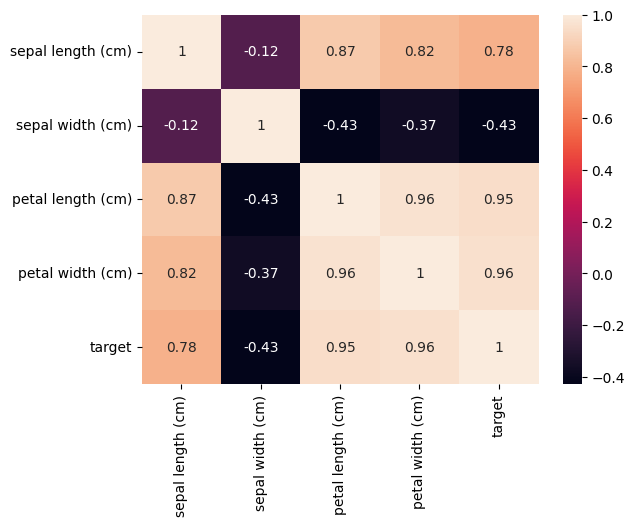

In [14]:
sns.heatmap(df.corr(),annot=True)

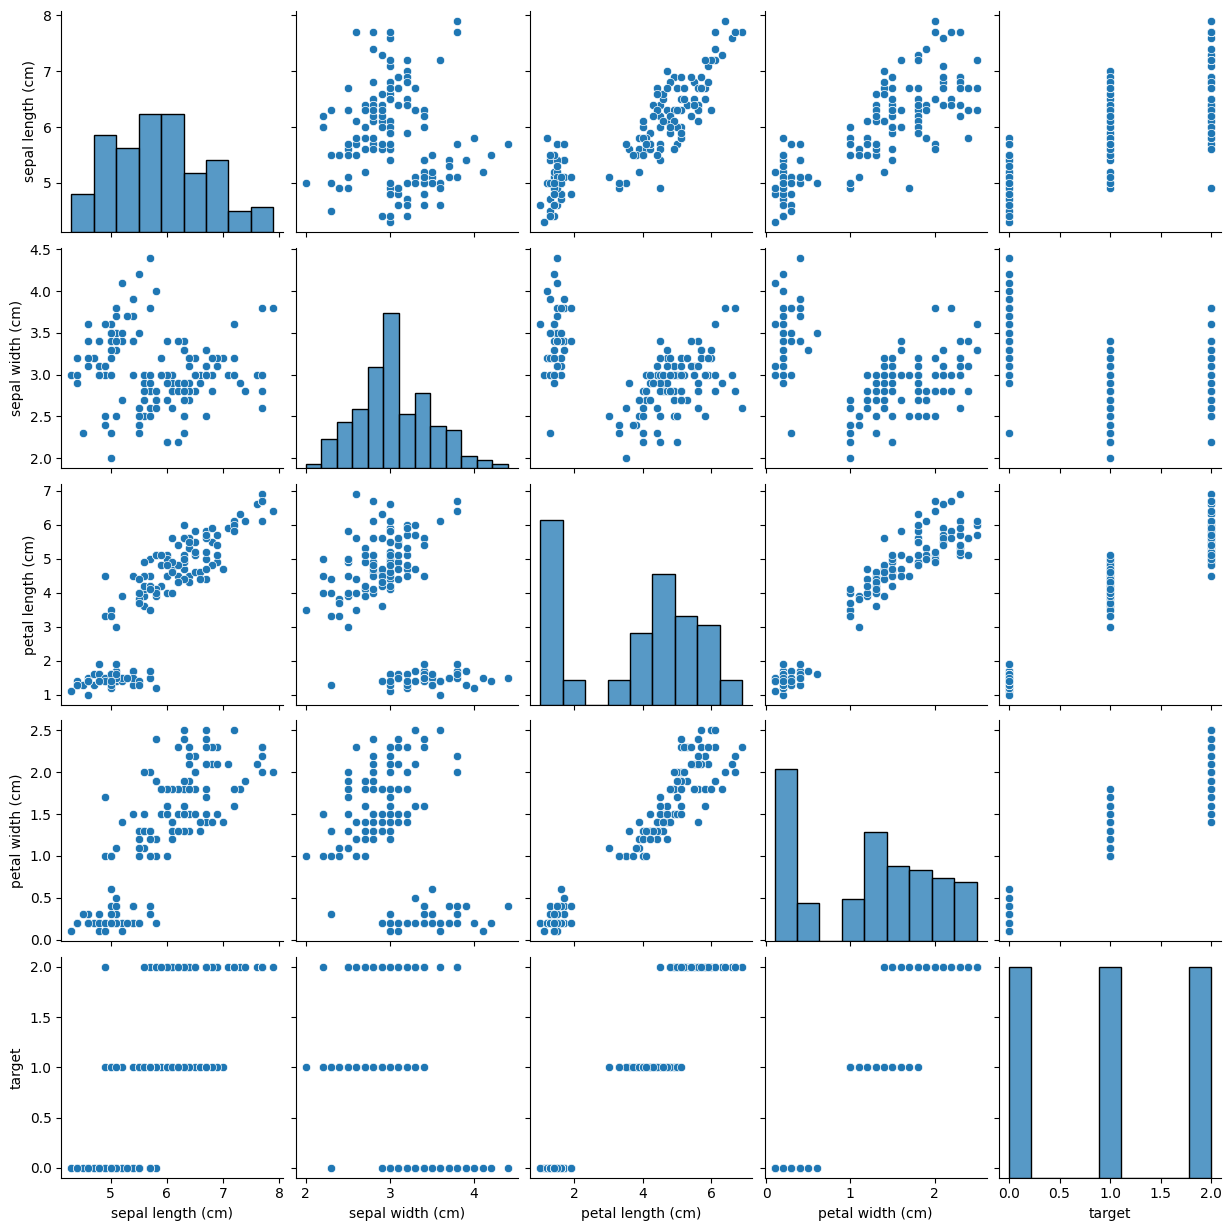

In [15]:
sns.pairplot(df)

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [17]:
x = df.iloc[:, [0, 1, 2, 3]].values

In [18]:
# create empty list to store sea values for each k
sea = []

# fit KMeans algorithm for k values between 1 and 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    sea.append(kmeans.inertia_)

# ELBOW METHOD
### The elbow method is a common technique for selecting the optimal number of clusters in k-means clustering. 
### The method involves plotting the within-cluster sum of squares (WCSS) as a function of the number of clusters, and identifying the "elbow" in the plot where the rate of decrease in WCSS slows down.
### within cluster sum of squares(WCSS)
### The WCSS is defined as the sum of the squared distances between each data point and its assigned centroid. 
### As the number of clusters increases, the WCSS generally decreases because the data points are being assigned to clusters that are closer to them.
### However, at some point, the rate of decrease in WCSS slows down, and adding more clusters does not significantly improve the clustering performance.

### This is where the "elbow" point occurs.

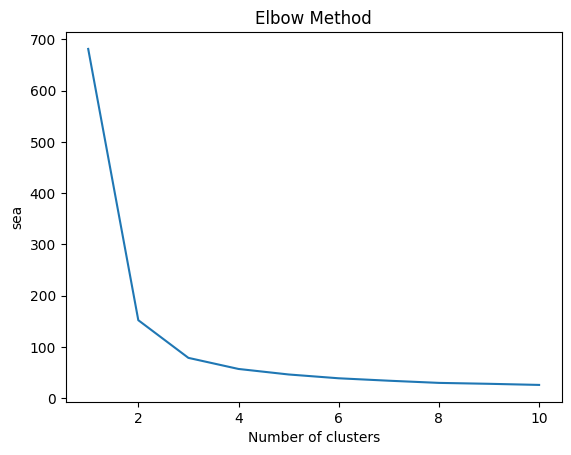

In [19]:
# plot the elbow curve
plt.plot(range(1, 11), sea)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('sea')
plt.show()

In [20]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [21]:
df['clusters']=y_predicted
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,clusters
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [22]:
df0 = df[df.clusters==0]
df1 = df[df.clusters==1]
df2 = df[df.clusters==2]

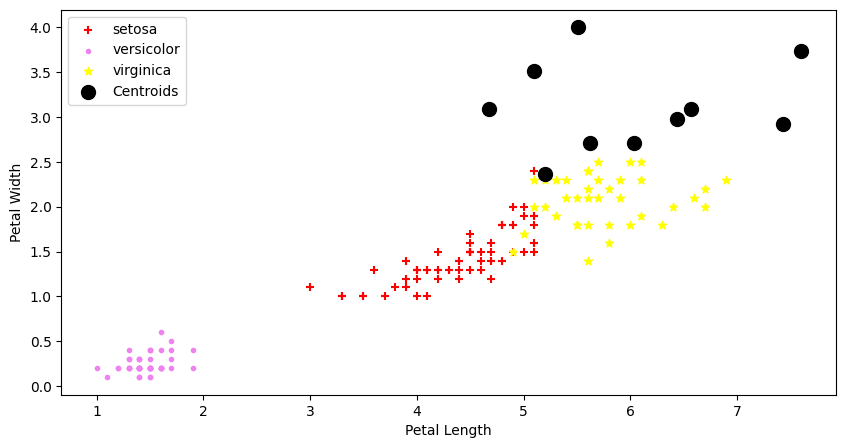

In [23]:
plt.figure(figsize=(10,5))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="red",marker='+',label='setosa')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="violet",marker='.',label='versicolor')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color="yellow",marker='*',label='virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids')
plt.legend()
plt.show()

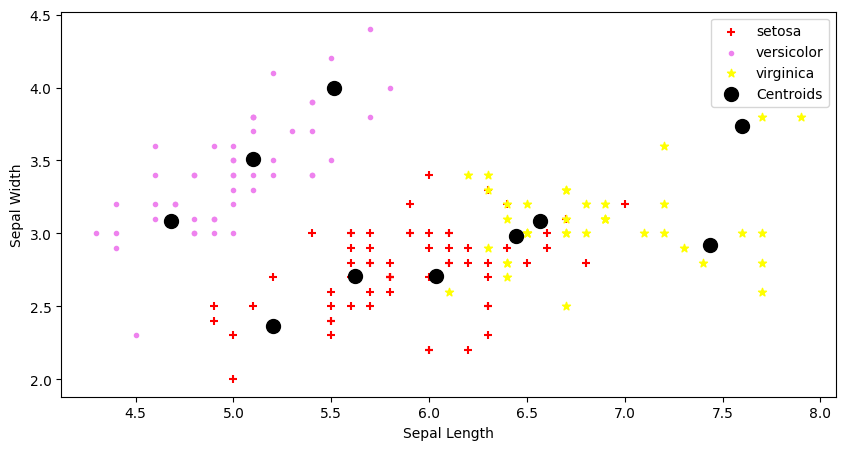

In [24]:
plt.figure(figsize=(10,5))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="red",marker='+',label='setosa')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="violet",marker='.',label='versicolor')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],color="yellow",marker='*',label='virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids')
plt.legend()
plt.show()

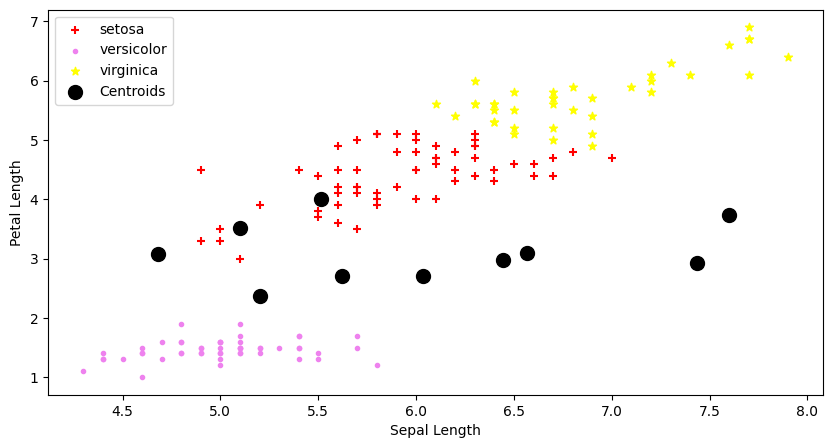

In [25]:
plt.figure(figsize=(10,5))
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.scatter(df0['sepal length (cm)'], df0['petal length (cm)'],color="red",marker='+',label='setosa')
plt.scatter(df1['sepal length (cm)'], df1['petal length (cm)'],color="violet",marker='.',label='versicolor')
plt.scatter(df2['sepal length (cm)'], df2['petal length (cm)'],color="yellow",marker='*',label='virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids')
plt.legend()
plt.show()

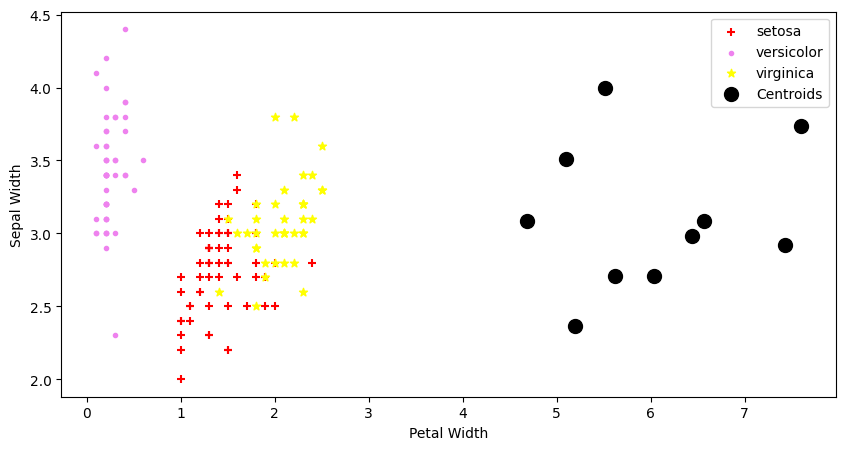

In [26]:
plt.figure(figsize=(10,5))
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.scatter(df0['petal width (cm)'], df0['sepal width (cm)'],color="red",marker='+',label='setosa')
plt.scatter(df1['petal width (cm)'], df1['sepal width (cm)'],color="violet",marker='.',label='versicolor')
plt.scatter(df2['petal width (cm)'], df2['sepal width (cm)'],color="yellow",marker='*',label='virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids')
plt.legend()
plt.show()

In [27]:
print(kmeans.cluster_centers_)

[[6.03684211 2.70526316 5.         1.77894737]
 [5.5125     4.         1.475      0.275     ]
 [6.56818182 3.08636364 5.53636364 2.16363636]
 [5.2        2.36666667 3.38333333 1.01666667]
 [4.67894737 3.08421053 1.37894737 0.2       ]
 [5.1        3.51304348 1.52608696 0.27391304]
 [5.62272727 2.70909091 4.11818182 1.28636364]
 [7.43333333 2.92222222 6.26666667 1.98888889]
 [6.44210526 2.97894737 4.59473684 1.43157895]
 [7.6        3.73333333 6.4        2.23333333]]
